In [1]:
import pandas as pd
import numpy as np

此为本人研究生课程“数据科学与机器学习”的课后个人作业，其目的是通过给定的APP相关数据集，运用机器学习手段，预测APP可能的得分(Rating).

In [2]:
df = pd.read_excel('PMA_data.xlsx', sheetname = 'Apps')

C:\Users\32832\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [3]:
df.shape

(10841, 13)

In [4]:
df = pd.DataFrame(df)

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df = df.drop(['App','Category','Type','Genres','Last Updated','Current Ver','Android Ver'], axis = 1)

In [7]:
df.head()

,Rating,Reviews,Size,Installs,Price,Content Rating
0,4.1,159,19M,"10,000+",0,Everyone
1,3.9,967,14M,"500,000+",0,Everyone
2,4.7,87510,8.7M,"5,000,000+",0,Everyone
3,4.5,215644,25M,"50,000,000+",0,Teen
4,4.3,967,2.8M,"100,000+",0,Everyone


In [8]:
df = df.dropna(axis=0,how='any')

In [9]:
df.shape

(9366, 6)

In [10]:
df.head()

,Rating,Reviews,Size,Installs,Price,Content Rating
0,4.1,159,19M,"10,000+",0,Everyone
1,3.9,967,14M,"500,000+",0,Everyone
2,4.7,87510,8.7M,"5,000,000+",0,Everyone
3,4.5,215644,25M,"50,000,000+",0,Teen
4,4.3,967,2.8M,"100,000+",0,Everyone
5,4.4,167,5.6M,"50,000+",0,Everyone
6,3.8,178,19M,"50,000+",0,Everyone
7,4.1,36815,29M,"1,000,000+",0,Everyone
8,4.4,13791,33M,"1,000,000+",0,Everyone
9,4.7,121,3.1M,"10,000+",0,Everyone


In [11]:
new_df = pd.DataFrame(df).reset_index()

In [12]:
new_df.head()

,index,Rating,Reviews,Size,Installs,Price,Content Rating
0,0,4.1,159,19M,"10,000+",0,Everyone
1,1,3.9,967,14M,"500,000+",0,Everyone
2,2,4.7,87510,8.7M,"5,000,000+",0,Everyone
3,3,4.5,215644,25M,"50,000,000+",0,Teen
4,4,4.3,967,2.8M,"100,000+",0,Everyone
5,5,4.4,167,5.6M,"50,000+",0,Everyone
6,6,3.8,178,19M,"50,000+",0,Everyone
7,7,4.1,36815,29M,"1,000,000+",0,Everyone
8,8,4.4,13791,33M,"1,000,000+",0,Everyone
9,9,4.7,121,3.1M,"10,000+",0,Everyone


In [13]:
new_df.dtypes

index               int64
Rating            float64
Reviews            object
Size               object
Installs           object
Price              object
Content Rating     object
dtype: object

In [14]:
new_df['Reviews'].value_counts()

2          83
3          78
4          74
5          74
1          67
6          62
7          62
8          57
12         53
10         46
9          39
11         39
13         37
17         36
19         33
16         31
14         30
21         29
20         28
25         27
15         26
18         25
33         24
27         23
22         23
38         23
30         22
28         22
24         21
26         20
           ..
480208      1
5073        1
537554      1
47576       1
62421       1
332623      1
70616       1
259003      1
1916        1
13205       1
4928420     1
152470      1
773         1
81502       1
21404       1
13213       1
26871       1
201631      1
13217       1
13223       1
120852      1
3491        1
5035        1
86956       1
5038        1
21423       1
35188       1
62386       1
267189      1
10773       1
Name: Reviews, Length: 5992, dtype: int64

In [15]:
new_df['Rating'].value_counts()

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.6      25
2.7      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [16]:
new_df['Size'].value_counts()

Varies with device    1637
14M                    166
12M                    161
11M                    160
15M                    159
13M                    157
25M                    137
17M                    131
19M                    129
21M                    120
24M                    118
16M                    117
20M                    115
26M                    110
18M                    108
23M                    106
22M                     98
10M                     96
27M                     88
28M                     77
37M                     75
33M                     71
35M                     70
30M                     69
29M                     69
31M                     66
3.3M                    63
40M                     58
46M                     57
44M                     57
                      ... 
582k                     1
879k                     1
779k                     1
986k                     1
246k                     1
306k                     1
5

In [17]:
new_df['Installs'].value_counts()

1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [18]:
new_df['Price'].value_counts()

0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
$3.99        58
$1.49        31
$2.49        21
$5.99        18
$9.99        16
$6.99        13
$399.99      11
$14.99       10
$4.49         9
$7.99         7
$3.49         7
$29.99        6
$24.99        5
$19.99        5
$12.99        5
$11.99        5
$8.99         4
$10.00        3
$16.99        3
$5.49         3
$3.95         2
$9.00         2
$1.70         2
$10.99        2
$79.99        2
           ... 
$1.29         1
$3.88         1
$13.99        1
$1.59         1
$37.99        1
$8.49         1
$1.97         1
$3.04         1
$1.76         1
$4.84         1
$1.61         1
$2.90         1
$15.99        1
$15.46        1
$3.28         1
$2.59         1
$389.99       1
$3.08         1
$2.00         1
$39.99        1
$379.99       1
$6.49         1
$4.29         1
$3.02         1
$2.95         1
$2.50         1
$299.99       1
$18.99        1
$4.77         1
$1.20         1
Name: Price, Length: 73,

In [19]:
new_df['Content Rating'].value_counts()

Everyone           7420
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [20]:
new_df = df[df['Size'] != 'Varies with device']

In [21]:
new_df = pd.DataFrame(new_df).reset_index()

In [22]:
new_df['Rating'] = np.where(new_df.Rating >= 4, 1, 0)

In [23]:
new_df.head()

,index,Rating,Reviews,Size,Installs,Price,Content Rating
0,0,1,159,19M,"10,000+",0,Everyone
1,1,0,967,14M,"500,000+",0,Everyone
2,2,1,87510,8.7M,"5,000,000+",0,Everyone
3,3,1,215644,25M,"50,000,000+",0,Teen
4,4,1,967,2.8M,"100,000+",0,Everyone


In [24]:
new_df = new_df.drop('index',axis = 1)

In [25]:
new_df['Installs'] = new_df['Installs'].str.replace('+','')
new_df['Installs'] = new_df['Installs'].str.replace(',','')


In [26]:
new_df.head()

,Rating,Reviews,Size,Installs,Price,Content Rating
0,1,159,19M,10000,0,Everyone
1,0,967,14M,500000,0,Everyone
2,1,87510,8.7M,5000000,0,Everyone
3,1,215644,25M,50000000,0,Teen
4,1,967,2.8M,100000,0,Everyone


In [27]:
new_df['Installs'] = new_df['Installs'].astype('float64')

In [28]:
new_df['Price'].value_counts()

0          7150
$0.99       106
$2.99       101
$4.99        63
$1.99        53
$3.99        45
$1.49        28
$2.49        17
$9.99        16
$5.99        15
$399.99      11
$14.99       10
$6.99         9
$4.49         8
$7.99         7
$3.49         6
$29.99        6
$19.99        5
$24.99        5
$11.99        4
$12.99        4
$16.99        3
$10.00        3
$1.70         2
$5.49         2
$1.00         2
$33.99        2
$17.99        2
$10.99        2
$79.99        2
           ... 
$1.50         1
$1.59         1
$1.29         1
$19.40        1
$13.99        1
$3.08         1
$2.59         1
$8.49         1
$1.97         1
$3.04         1
$1.76         1
$4.84         1
$1.61         1
$2.90         1
$15.99        1
$15.46        1
$3.28         1
$37.99        1
$4.77         1
$389.99       1
$2.00         1
$7.49         1
$39.99        1
$379.99       1
$3.02         1
$4.29         1
$1.20         1
$299.99       1
$18.99        1
$6.49         1
Name: Price, Length: 68,

In [29]:
new_df['Price']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
7699    0
7700    0
7701    0
7702    0
7703    0
7704    0
7705    0
7706    0
7707    0
7708    0
7709    0
7710    0
7711    0
7712    0
7713    0
7714    0
7715    0
7716    0
7717    0
7718    0
7719    0
7720    0
7721    0
7722    0
7723    0
7724    0
7725    0
7726    0
7727    0
7728    0
Name: Price, Length: 7729, dtype: object

In [30]:
new_df.dtypes

Rating              int32
Reviews            object
Size               object
Installs          float64
Price              object
Content Rating     object
dtype: object

In [31]:
price = new_df['Price'].values.tolist()

In [32]:
price

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '$4.99',
 '$4.99',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '$4.99',
 '$4.99',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [33]:
price_list = list()

In [34]:
for p in price:
    if p is 0:
        p=p
    else:
        p = p[1:]
    price_list.append(p)

In [35]:
price_list

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '4.99',
 '4.99',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '4.99',
 '4.99',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [36]:
P = pd.DataFrame(price_list)

In [37]:
P.shape

(7729, 1)

In [38]:
P

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [39]:
new_df['Price'] = P

In [40]:
new_df

,Rating,Reviews,Size,Installs,Price,Content Rating
0,1,159,19M,10000.0,0,Everyone
1,0,967,14M,500000.0,0,Everyone
2,1,87510,8.7M,5000000.0,0,Everyone
3,1,215644,25M,50000000.0,0,Teen
4,1,967,2.8M,100000.0,0,Everyone
5,1,167,5.6M,50000.0,0,Everyone
6,0,178,19M,50000.0,0,Everyone
7,1,36815,29M,1000000.0,0,Everyone
8,1,13791,33M,1000000.0,0,Everyone
9,1,121,3.1M,10000.0,0,Everyone


In [41]:
new_df['Price'].value_counts()

0         7150
0.99       106
2.99       101
4.99        63
1.99        53
3.99        45
1.49        28
2.49        17
9.99        16
5.99        15
399.99      11
14.99       10
6.99         9
4.49         8
7.99         7
3.49         6
29.99        6
24.99        5
19.99        5
12.99        4
11.99        4
16.99        3
10.00        3
8.99         2
9.00         2
17.99        2
33.99        2
5.49         2
79.99        2
10.99        2
          ... 
2.90         1
6.49         1
1.75         1
15.99        1
1.61         1
4.84         1
8.49         1
1.59         1
4.60         1
13.99        1
1.50         1
1.29         1
2.00         1
18.99        1
379.99       1
389.99       1
37.99        1
3.08         1
1.97         1
2.56         1
3.02         1
4.29         1
15.46        1
7.49         1
3.28         1
19.40        1
3.88         1
299.99       1
1.76         1
4.77         1
Name: Price, Length: 68, dtype: int64

In [42]:
size_list = list()

In [43]:
np_size = new_df['Size'].values

In [44]:
np_size

array(['19M', '14M', '8.7M', ..., '53M', '3.6M', '19M'], dtype=object)

In [45]:
for s in np_size:
    if s[-1] == 'M':
        s = s[:-1]
        s = float(s)
        s = s * 1024
    else:
        s = s[:-1]
        s = float(s)
    size_list.append(s)

In [46]:
size_list

[19456.0,
 14336.0,
 8908.8,
 25600.0,
 2867.2,
 5734.4,
 19456.0,
 29696.0,
 33792.0,
 3174.4,
 28672.0,
 12288.0,
 20480.0,
 21504.0,
 37888.0,
 2764.8,
 5632.0,
 17408.0,
 39936.0,
 31744.0,
 14336.0,
 12288.0,
 4300.8,
 23552.0,
 6144.0,
 25600.0,
 6246.4,
 4710.4,
 4300.8,
 9420.8,
 5324.8,
 11264.0,
 11264.0,
 4300.8,
 9420.8,
 24576.0,
 11264.0,
 9625.6,
 15360.0,
 10240.0,
 1228.8,
 12288.0,
 24576.0,
 26624.0,
 8192.0,
 8089.6,
 25600.0,
 57344.0,
 58368.0,
 35840.0,
 33792.0,
 33792.0,
 5734.4,
 55296.0,
 201.0,
 3686.4,
 5836.8,
 17408.0,
 8806.4,
 2457.6,
 27648.0,
 2764.8,
 2560.0,
 7168.0,
 35840.0,
 16384.0,
 16384.0,
 17408.0,
 3481.6,
 9113.6,
 3993.6,
 2969.6,
 38912.0,
 32768.0,
 37888.0,
 15360.0,
 5529.6,
 18432.0,
 38912.0,
 1126.4,
 8089.6,
 35840.0,
 17408.0,
 19456.0,
 14336.0,
 2252.8,
 4608.0,
 17408.0,
 14336.0,
 10035.2,
 21504.0,
 53248.0,
 14336.0,
 25600.0,
 9216.0,
 12288.0,
 35840.0,
 6860.8,
 30720.0,
 2969.6,
 17408.0,
 2969.6,
 2662.4,
 4300.8,
 727

In [47]:
S = pd.DataFrame(size_list)

In [48]:
S.shape

(7729, 1)

In [49]:
new_df['Size'] = S

In [50]:
new_df

,Rating,Reviews,Size,Installs,Price,Content Rating
0,1,159,19456.0,10000.0,0,Everyone
1,0,967,14336.0,500000.0,0,Everyone
2,1,87510,8908.8,5000000.0,0,Everyone
3,1,215644,25600.0,50000000.0,0,Teen
4,1,967,2867.2,100000.0,0,Everyone
5,1,167,5734.4,50000.0,0,Everyone
6,0,178,19456.0,50000.0,0,Everyone
7,1,36815,29696.0,1000000.0,0,Everyone
8,1,13791,33792.0,1000000.0,0,Everyone
9,1,121,3174.4,10000.0,0,Everyone


In [51]:
new_df.rename(columns={'Size': 'Size_Kb'}, inplace=True)

In [52]:
new_df

,Rating,Reviews,Size_Kb,Installs,Price,Content Rating
0,1,159,19456.0,10000.0,0,Everyone
1,0,967,14336.0,500000.0,0,Everyone
2,1,87510,8908.8,5000000.0,0,Everyone
3,1,215644,25600.0,50000000.0,0,Teen
4,1,967,2867.2,100000.0,0,Everyone
5,1,167,5734.4,50000.0,0,Everyone
6,0,178,19456.0,50000.0,0,Everyone
7,1,36815,29696.0,1000000.0,0,Everyone
8,1,13791,33792.0,1000000.0,0,Everyone
9,1,121,3174.4,10000.0,0,Everyone


In [53]:
new_df.dtypes

Rating              int32
Reviews            object
Size_Kb           float64
Installs          float64
Price              object
Content Rating     object
dtype: object

In [54]:
new_df['Price'].value_counts()

0         7150
0.99       106
2.99       101
4.99        63
1.99        53
3.99        45
1.49        28
2.49        17
9.99        16
5.99        15
399.99      11
14.99       10
6.99         9
4.49         8
7.99         7
3.49         6
29.99        6
24.99        5
19.99        5
12.99        4
11.99        4
16.99        3
10.00        3
8.99         2
9.00         2
17.99        2
33.99        2
5.49         2
79.99        2
10.99        2
          ... 
2.90         1
6.49         1
1.75         1
15.99        1
1.61         1
4.84         1
8.49         1
1.59         1
4.60         1
13.99        1
1.50         1
1.29         1
2.00         1
18.99        1
379.99       1
389.99       1
37.99        1
3.08         1
1.97         1
2.56         1
3.02         1
4.29         1
15.46        1
7.49         1
3.28         1
19.40        1
3.88         1
299.99       1
1.76         1
4.77         1
Name: Price, Length: 68, dtype: int64

In [55]:
new_df['Content Rating'].value_counts()

Everyone           6172
Teen                868
Mature 17+          368
Everyone 10+        318
Adults only 18+       2
Unrated               1
Name: Content Rating, dtype: int64

In [56]:
new_df['Content Rating'] = new_df['Content Rating'].replace('Unrated','Everyone')
new_df['Content Rating'] = new_df['Content Rating'].replace('Everyone 10+','Teen')
new_df['Content Rating'] = new_df['Content Rating'].replace('Adults only 18+','Mature 17+')
new_df['Content Rating'] = new_df['Content Rating'].replace('Teen','Teen_Target_Apps')
new_df['Content Rating'] = new_df['Content Rating'].replace('Mature 17+','Adults_Target_Apps')

In [57]:
new_df['Content Rating'].value_counts()

Everyone              6173
Teen_Target_Apps      1186
Adults_Target_Apps     370
Name: Content Rating, dtype: int64

In [58]:
df2 = pd.get_dummies(new_df['Content Rating'])

In [59]:
df2

,Adults_Target_Apps,Everyone,Teen_Target_Apps
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0


In [60]:
new_df = new_df.join(df2)

In [61]:
new_df = new_df.drop('Content Rating',axis = 1)

In [62]:
new_df

,Rating,Reviews,Size_Kb,Installs,Price,Adults_Target_Apps,Everyone,Teen_Target_Apps
0,1,159,19456.0,10000.0,0,0,1,0
1,0,967,14336.0,500000.0,0,0,1,0
2,1,87510,8908.8,5000000.0,0,0,1,0
3,1,215644,25600.0,50000000.0,0,0,0,1
4,1,967,2867.2,100000.0,0,0,1,0
5,1,167,5734.4,50000.0,0,0,1,0
6,0,178,19456.0,50000.0,0,0,1,0
7,1,36815,29696.0,1000000.0,0,0,1,0
8,1,13791,33792.0,1000000.0,0,0,1,0
9,1,121,3174.4,10000.0,0,0,1,0


In [63]:
Y = new_df['Rating']
X = new_df.drop(['Rating'], axis = 1)

In [64]:
Y.value_counts()

1    5928
0    1801
Name: Rating, dtype: int64

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

C:\Users\32832\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\32832\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.1580766 , -0.16879462, -0.16770116, ..., -0.22422884,
         0.5020612 , -0.42574924],
       [-0.15764292, -0.38206612, -0.15792759, ..., -0.22422884,
         0.5020612 , -0.42574924],
       [-0.111192  , -0.60813392, -0.06817032, ..., -0.22422884,
         0.5020612 , -0.42574924],
       ...,
       [-0.15814155,  1.28145162, -0.16780089, ..., -0.22422884,
         0.5020612 , -0.42574924],
       [-0.1581598 , -0.82567086, -0.16789863, ..., -0.22422884,
         0.5020612 , -0.42574924],
       [ 0.05562454, -0.16879462,  0.03155998, ..., -0.22422884,
         0.5020612 , -0.42574924]])

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


from sklearn.linear_model import LogisticRegression

# a logistic regression model with default values
log_reg = LogisticRegression()

# fit the model using some training data
log_reg_fit = log_reg.fit(X_train, Y_train)

train_score = log_reg.score(X_train, Y_train)
train_score

(6183, 7)
(1546, 7)
(6183,)
(1546,)


C:\Users\32832\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7656477438136827

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

tuned_parameters = [{'penalty': ['l1', 'l2'],
                     'C': [0.5, 1, 5, 10]}]

scores = ['precision', 'recall', 'f1']

for score in scores:
    print("# Tuning hyperparameters for %s" % score)
    print("\n")
    clf = GridSearchCV(LogisticRegression(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, Y_train)
    print("Best parameters set found on the training set:")
    print(clf.best_params_)
    print("\n")

C:\Users\32832\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\32832\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Tuning hyperparameters for precision




C:\Users\32832\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\32832\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\32832\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\32832\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\32832\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set

Best parameters set found on the training set:
{'C': 1, 'penalty': 'l2'}


# Tuning hyperparameters for recall




C:\Users\32832\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\32832\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\32832\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\32832\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\32832\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Best parameters set found on the training set:
{'C': 1, 'penalty': 'l1'}


# Tuning hyperparameters for f1




C:\Users\32832\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\32832\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\32832\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\32832\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\32832\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. 

Best parameters set found on the training set:
{'C': 1, 'penalty': 'l1'}




C:\Users\32832\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\32832\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\32832\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


from sklearn.linear_model import LogisticRegression

# a logistic regression model with default values
log_reg = LogisticRegression(C=1, penalty = "l1")

# fit the model using some training data
log_reg_fit = log_reg.fit(X_train, Y_train)

train_score = log_reg.score(X_train, Y_train)
train_score

# predict the test data
predicted = log_reg.predict(X_test)

# generate a mean accuracy score for the predicted data
test_score = log_reg.score(X_test, Y_test)

# print the mean accuracy of testing predictions
print("Accuracy score = " + str(round(test_score, 4)))

C:\Users\32832\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(6183, 7)
(1546, 7)
(6183,)
(1546,)
Accuracy score = 0.7743


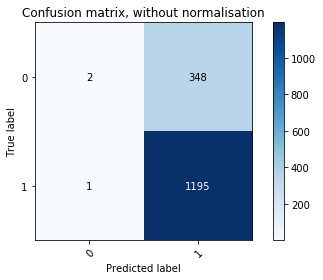

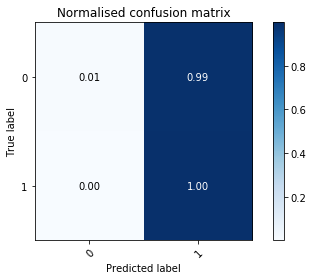

In [69]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
%matplotlib inline

np.set_printoptions(precision=2)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalise=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          multi=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalise=True`.
    """
    if not title:
        if normalise:
            title = 'Normalised confusion matrix'
        else:
            title = 'Confusion matrix, without normalisation'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data
    if multi==True:
    	classes = classes[unique_labels(y_true, y_pred)]
    if normalise:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor");

    fmt = '.2f' if normalise else 'd'
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

    return ax

# predict the test data
predicted = log_reg.predict(X_test)

# Plot non-normalised confusion matrix
plot_confusion_matrix(Y_test, predicted, classes=["0", "1"])

# Plot normalised confusion matrix
plot_confusion_matrix(Y_test, predicted, classes=["0", "1"], normalise=True)

In [70]:
from sklearn.metrics import classification_report,confusion_matrix
print (classification_report(Y_test,predicted))

              precision    recall  f1-score   support

           0       0.67      0.01      0.01       350
           1       0.77      1.00      0.87      1196

   micro avg       0.77      0.77      0.77      1546
   macro avg       0.72      0.50      0.44      1546
weighted avg       0.75      0.77      0.68      1546



In [71]:
from sklearn.ensemble import AdaBoostClassifier
# split data into training and test - you may need to change to sklearn.model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


from sklearn.ensemble import AdaBoostClassifier

abt = AdaBoostClassifier()
abt.fit(X_train, Y_train)

train_score = abt.score(X_train, Y_train)
train_score

# predict the test data
predicted = abt.predict(X_test)

# generate a mean accuracy score for the predicted data
test_score = abt.score(X_test, Y_test)

# print the mean accuracy of testing predictions
print("Accuracy score = " + str(round(test_score, 4)))

(6183, 7)
(1546, 7)
(6183,)
(1546,)
Accuracy score = 0.7684


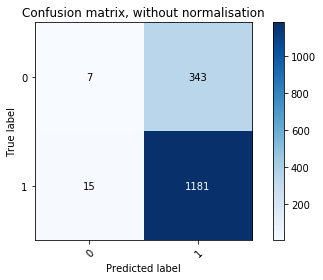

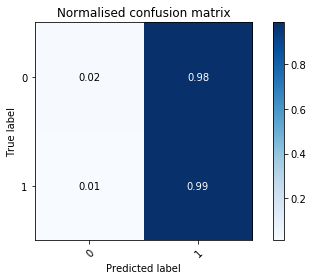

In [72]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
%matplotlib inline

np.set_printoptions(precision=2)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalise=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          multi=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalise=True`.
    """
    if not title:
        if normalise:
            title = 'Normalised confusion matrix'
        else:
            title = 'Confusion matrix, without normalisation'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data
    if multi==True:
    	classes = classes[unique_labels(y_true, y_pred)]
    if normalise:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor");

    fmt = '.2f' if normalise else 'd'
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

    return ax

# predict the test data
predicted = abt.predict(X_test)

# Plot non-normalised confusion matrix
plot_confusion_matrix(Y_test, predicted, classes=["0", "1"])

# Plot normalised confusion matrix
plot_confusion_matrix(Y_test, predicted, classes=["0", "1"], normalise=True)

In [73]:
from sklearn.metrics import classification_report,confusion_matrix
print (classification_report(Y_test,predicted))

              precision    recall  f1-score   support

           0       0.32      0.02      0.04       350
           1       0.77      0.99      0.87      1196

   micro avg       0.77      0.77      0.77      1546
   macro avg       0.55      0.50      0.45      1546
weighted avg       0.67      0.77      0.68      1546



In [74]:
from sklearn.ensemble import BaggingClassifier
# split data into training and test - you may need to change to sklearn.model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier(bootstrap=True, bootstrap_features=True)
bc.fit(X_train, Y_train)

# generate a mean accuracy score for the predicted data
test_score = bc.score(X_test, Y_test)

# print the mean accuracy of testing predictions
print("Accuracy score = " + str(round(test_score, 4)))

(6183, 7)
(1546, 7)
(6183,)
(1546,)
Accuracy score = 0.762


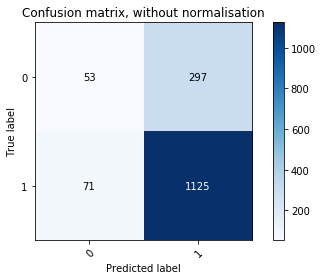

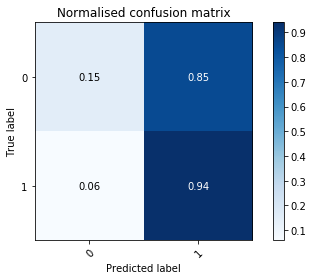

In [75]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
%matplotlib inline

np.set_printoptions(precision=2)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalise=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          multi=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalise=True`.
    """
    if not title:
        if normalise:
            title = 'Normalised confusion matrix'
        else:
            title = 'Confusion matrix, without normalisation'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data
    if multi==True:
    	classes = classes[unique_labels(y_true, y_pred)]
    if normalise:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor");

    fmt = '.2f' if normalise else 'd'
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

    return ax

# predict the test data
predicted = bc.predict(X_test)

# Plot non-normalised confusion matrix
plot_confusion_matrix(Y_test, predicted, classes=["0", "1"])

# Plot normalised confusion matrix
plot_confusion_matrix(Y_test, predicted, classes=["0", "1"], normalise=True)

In [76]:
from sklearn.metrics import classification_report,confusion_matrix
print (classification_report(Y_test,predicted))

              precision    recall  f1-score   support

           0       0.43      0.15      0.22       350
           1       0.79      0.94      0.86      1196

   micro avg       0.76      0.76      0.76      1546
   macro avg       0.61      0.55      0.54      1546
weighted avg       0.71      0.76      0.72      1546



In [77]:
from sklearn.ensemble import VotingClassifier
# split data into training and test - you may need to change to sklearn.model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)


from sklearn.ensemble import VotingClassifier 
vlf = VotingClassifier(estimators=[('lr',log_reg),('abt',abt), ('bc', bc)], voting = 'hard')
vf = vlf.fit(X_train, Y_train)


# generate a mean accuracy score for the predicted data
test_score = vf.score(X_test, Y_test)

# print the mean accuracy of testing predictions
print("Accuracy score = " + str(round(test_score, 4)))

C:\Users\32832\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score = 0.7743


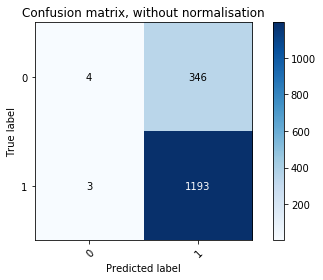

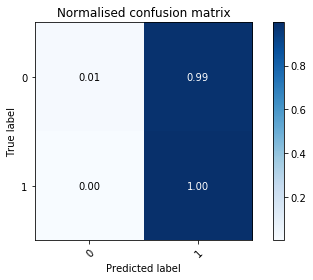

In [78]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
%matplotlib inline

np.set_printoptions(precision=2)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalise=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          multi=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalise=True`.
    """
    if not title:
        if normalise:
            title = 'Normalised confusion matrix'
        else:
            title = 'Confusion matrix, without normalisation'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data
    if multi==True:
    	classes = classes[unique_labels(y_true, y_pred)]
    if normalise:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor");

    fmt = '.2f' if normalise else 'd'
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

    return ax

# predict the test data
predicted = vf.predict(X_test)

# Plot non-normalised confusion matrix
plot_confusion_matrix(Y_test, predicted, classes=["0", "1"])

# Plot normalised confusion matrix
plot_confusion_matrix(Y_test, predicted, classes=["0", "1"], normalise=True)

In [79]:
from sklearn.metrics import classification_report,confusion_matrix
print (classification_report(Y_test,predicted))

              precision    recall  f1-score   support

           0       0.57      0.01      0.02       350
           1       0.78      1.00      0.87      1196

   micro avg       0.77      0.77      0.77      1546
   macro avg       0.67      0.50      0.45      1546
weighted avg       0.73      0.77      0.68      1546

